In [1]:
'''
7/22/2024

H2O PySR Code V1a
Data: Computational
Operators: Only log
Maxdepth and maxsize: Not included


Create 6 versions of the code:
w/ Computational data:
- V1a: Fit w/ log as the unary operator
- V1b: V1a w/ maxdepth and maxsize
- V2a: Fit w/ sin, cos, etc. log as unary operator
- V2b: V2a w/ maxdepth and maxsize

w/ Computational & Experimental data:
- V3a: Fit w/ sin, cos, log etc.
- V3b: V3a w/ maxdepth and maxsize


- Meet 7/24/2024 @ 4pm
- Meet 7/28/2024 @ 4pm
'''

## SHARED WITH Malik B -- 20240711

import numpy as np
from pysr import PySRRegressor
!pip install matplotlib
import matplotlib.pyplot as plt

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [2]:
#The following are the parameters estimated based on DFT calculations
W_V = -13.06
W_U = -299.54
W_S = -8.04
W_V2 = 490.89
lambda_X1 = 2.62
lambda_X2 = -0.68

R_const = 8.314 # J/mol-K -- gas constant
grid_size = 10000

In [46]:
#get random samples of T
# T_mock_arr = np.random.uniform(750,6000,grid_size)
T_mock_data = np.array([750, 1000, 1500, 2000, 3000, 4000])
# T_mock_arr = np.zeros((grid_size))
T_mock_arr = np.random.choice(T_mock_data, grid_size)
# T_mock_arr = T_mock_arr + 3000
# T_mock_arr = np.linspace(750,6000,grid_size)

#get random samples of X_H2
XH2_mock_arr = np.random.uniform(0.01,0.99,grid_size)
# XH2_mock_arr = np.linspace(0.01,0.99,grid_size) # X_H2

T_arr = []#np.zeros((grid_size,grid_size,grid_size))
P_arr = []#np.zeros((grid_size,grid_size,grid_size))
XH2_arr = []#np.zeros((grid_size,grid_size,grid_size))
P_norm_arr = []

################################################################################################
# This function is basically f(X_H2,T,P) = 0; X_H2O = 1 - X_H2
################################################################################################

In [47]:
len(T_mock_arr), T_mock_arr

(10000, array([3000,  750,  750, ..., 1000, 2000, 2000]))

In [48]:
def est_W_params_w_Y(T_d, Y_d, W_V, W_U, W_S, W_V2=0, W_V3=0, W_V4=0, flag_return_value=0):

    temp1 = (W_V + (((T_d/1000)**(-2))*W_V2))
    temp2 = (R_const*T_d*(np.log( Y_d/(1-Y_d) )) )/(2.*(2*Y_d - 1))
    temp3 = W_U - (T_d)*W_S
    P_est = (temp2 - temp3)/temp1

    if flag_return_value == 1:  
        return temp1 # W_V_eff
    if flag_return_value == 2:  
        return temp3 # W_0 or W_U - T*W_S
    else:
        return P_est
################################################################################################
################################################################################################

In [49]:
def est_lambda_X_eff(T_d, lambda_X1, lambda_X2, flag_return_value=0):

    lambda_X_eff = lambda_X1 + (lambda_X2/(T_d/1000))

    return lambda_X_eff
################################################################################################
################################################################################################

In [50]:

X_mock_P_min = np.random.uniform(0.01,0.99,1000)
P_min_arr = []

for ind1 in range(len(T_mock_data)):
    P_arr_T = []
    for ind2 in range(len(X_mock_P_min)):
        T_mock = T_mock_data[ind1]
        X_mock = X_mock_P_min[ind2]
    
        lambda_X_eff = est_lambda_X_eff(T_mock, lambda_X1, lambda_X2)
        lambda_X = lambda_X_eff
        
        Y_mock = X_mock/(X_mock + lambda_X*(1-X_mock))
        
        P_mock = est_W_params_w_Y(T_mock, Y_mock, W_V, W_U, W_S, W_V2=W_V2 )
    
        P_arr_T = np.append(P_arr_T, P_mock)

    P_min_arr = np.append(P_min_arr, np.min(P_arr_T))



In [51]:
print(P_min_arr)

[ 0.5875065   1.20030457  3.46415726  7.72862335 27.03628949 79.20361006]


In [52]:
################################################################################################
# This is for creating an array for immiscibility curve
################################################################################################
# for ind2 in range(len(XH2_mock_arr)):
for ind1 in range(len(T_mock_arr)):
    T_mock = T_mock_arr[ind1]
    X_mock = XH2_mock_arr[ind1]

    lambda_X_eff = est_lambda_X_eff(T_mock, lambda_X1, lambda_X2)
    lambda_X = lambda_X_eff
    
    Y_mock = X_mock/(X_mock + lambda_X*(1-X_mock))
    
    P_mock = est_W_params_w_Y(T_mock, Y_mock, W_V, W_U, W_S, W_V2=W_V2 )

    T_arr = np.append(T_arr, T_mock)
    P_arr = np.append(P_arr, P_mock)
    XH2_arr = np.append(XH2_arr, X_mock)

    if(T_mock == 750):
        P_mock_norm = P_mock/P_min_arr[0]
    if(T_mock == 1000):
        P_mock_norm = P_mock/P_min_arr[1]
    if(T_mock == 1500):
        P_mock_norm = P_mock/P_min_arr[2]
    if(T_mock == 2000):
        P_mock_norm = P_mock/P_min_arr[3]
    if(T_mock == 3000):
        P_mock_norm = P_mock/P_min_arr[4]
    if(T_mock == 4000):
        P_mock_norm = P_mock/P_min_arr[5]

    P_norm_arr = np.append(P_norm_arr, P_mock_norm)
        
    # # Add Asymptotic behavior
    # large_P_val = 140000 # units of Gpa 
    # T_vals = [750, 1000, 1500, 2000, 3000, 4000] # units of K
    # for T in T_vals:
    #     T_arr = np.append(T_arr, T)
    #     P_arr = np.append(P_arr, large_P_val)
    #     XH2_arr = np.append(XH2_arr, 0.00)

    #     T_arr = np.append(T_arr, T)
    #     P_arr = np.append(P_arr, large_P_val)
    #     XH2_arr = np.append(XH2_arr, 1.00)




################################################################################################
################################################################################################

In [53]:
# Normalize data


In [56]:
## Use arrays T_arr, P_arr, XH2_arr as your "X" and "Y"

# Use XH_2_arr and T_arr as the independent variables (X)
X = np.column_stack((XH2_arr, T_arr))

# Use P_arr as the dependent variable (Y)
Y = P_norm_arr

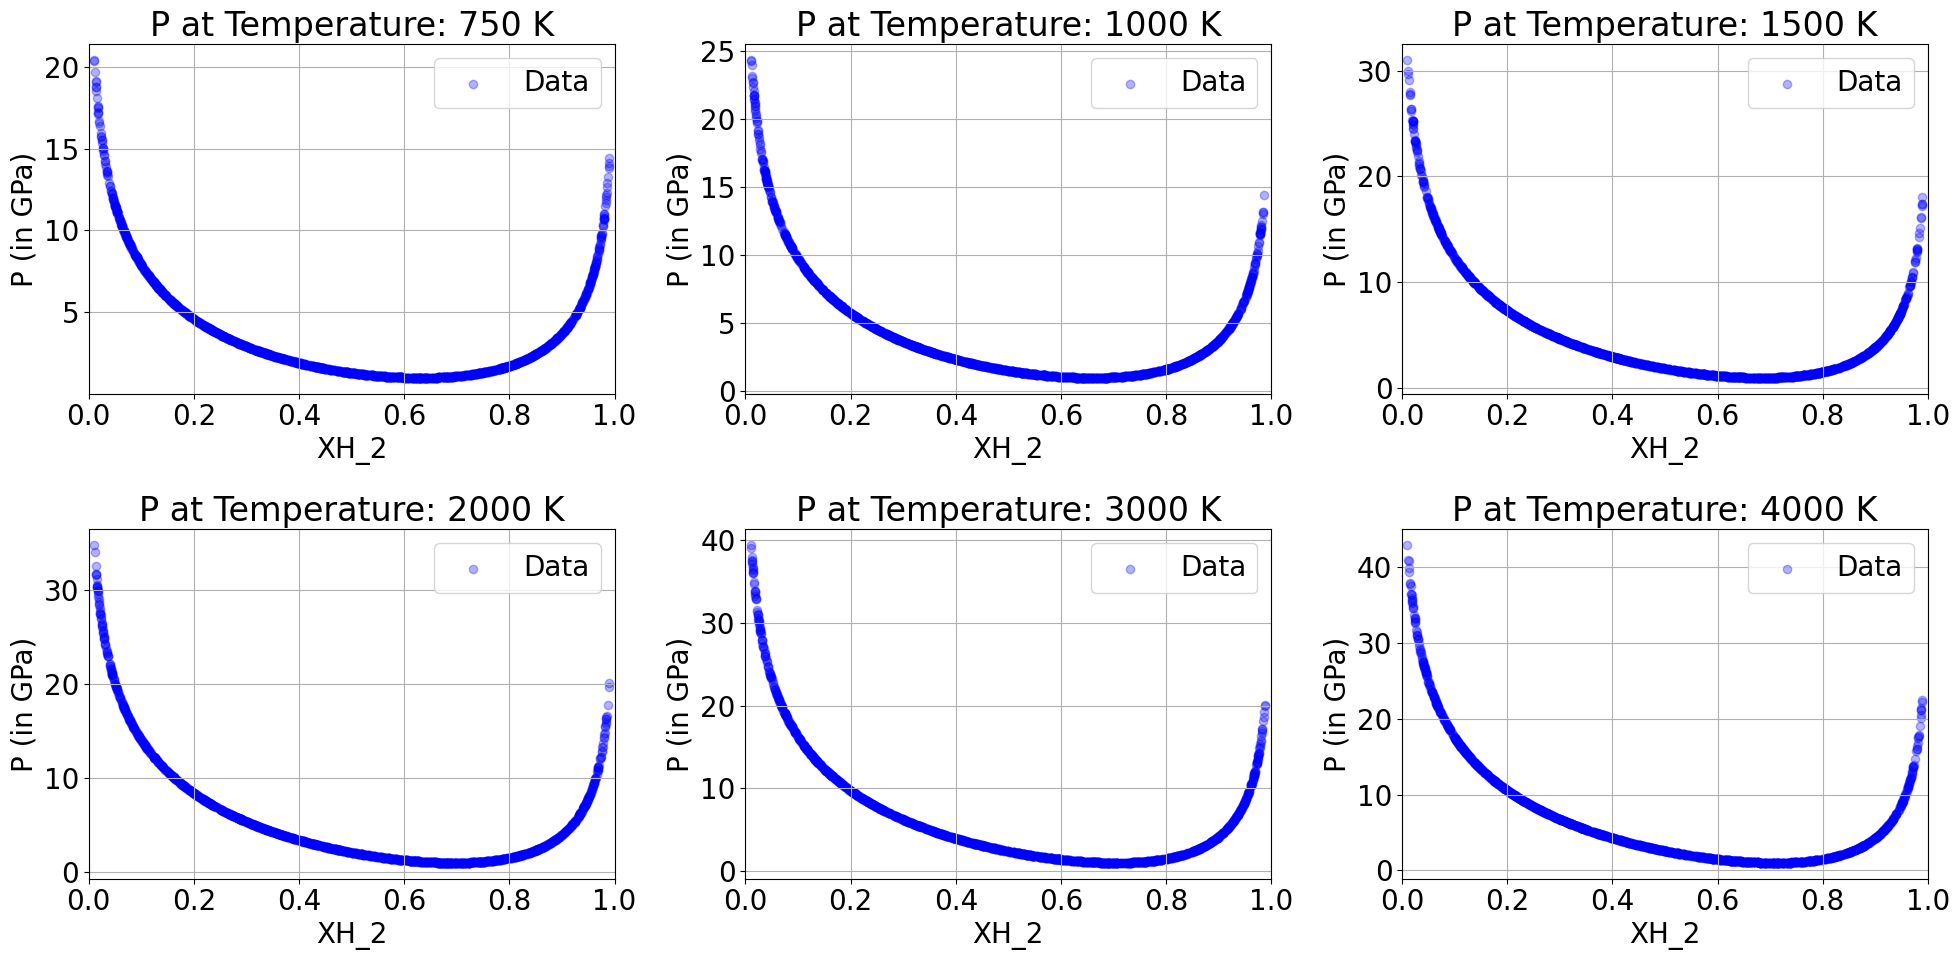

In [58]:
# Temperatures to loop over
temperatures = [750, 1000, 1500, 2000, 3000, 4000]

# Create figure and subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
plt.rcParams['font.size'] = 20

for i, temp in enumerate(temperatures):
    ind_arr = np.where(T_arr == temp)[0]
    
    # Refined data
    T_plot = T_arr[ind_arr]
    P_plot = P_norm_arr[ind_arr]
    XH2_plot = XH2_arr[ind_arr]

    # Replace x0 with XH2_plot and x1 with XH2_plot
    x0 = XH2_plot
    x1 = T_plot

    # Predict Y values
    Y_pred = 0.33409646 + (((((-5.493549 / np.log(x0 * 0.9702108)) + 0.064816) + (x1 / (((-1.2801906 - (x0 / -1.3122578)) + (x1 / (x1 - (((131.06126 * 3.4218006) - (-5.493549 / np.log(x0))) * ((-1.3122578 + x0) + (3.5956953 + (x0 - (x0 * -1.1628768)))))))) / 0.064816))) - np.log(x1)) + ((-1.3786008 + -0.055632327) / -0.4946338))
    # Select subplot
    ax = axes[i // 3, i % 3] 
    
    # Plot the data and the best fit line
    # ax.scatter(XH2_plot, Y_pred, label='Best Fit Line', color='red')
    ax.scatter(XH2_plot, P_plot, label='Data', color='blue', alpha=0.3)
    ax.set_xlabel('XH_2')
    ax.set_ylabel('P (in GPa)')
    ax.set_title(f'P at Temperature: {temp} K')
    ax.legend()
    ax.grid(True)
    ax.set_xlim(0, 1)

plt.tight_layout()
plt.show()

In [36]:
# Instantiate and fit PySRRegressor
model = PySRRegressor(
        niterations=40,
        binary_operators=["+", "*", "-", "/"],
        unary_operators=[
            "log",
        ],
        elementwise_loss="loss(prediction, target) = (prediction - target)^2",
        warm_start=False,
    )

In [59]:
# Fit the new data
model.fit(X, Y)

/home/mb1943/.conda/envs/usrp24/lib/python3.12/site-packages/pysr/sr.py:1843: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/mb1943/.conda/envs/usrp24/lib/python3.12/site-packages/pysr/sr.py:1307: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 1.750e+04
Head worker occupation: 10.8%
Progress: 39 / 600 total iterations (6.500%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           6.660e+01  1.594e+01  y = -0.24598
2           3.793e+01  5.630e-01  y = log(x₁)
3           3.299e+01  1.396e-01  y = 5.8994 - x₀
4           2.813e+01  1.592e-01  y = 3.4653 - log(x₀)
5           1.420e+01  6.840e-01  y = 3.1548 - (-0.41308 / x₀)
6           1.371e+01  3.512e-02  y = (-2.7108 + -1.9689) * log(x₀)
7           1.270e+01  7.648e-02  y = log(x₀) * (-1.9689 + log(0.023713))
8           1.261e+01  7.015e-03  y = (-0.76411 + -1.9689) * log(x₀ * x₀)
9           8.715e+00  3.692e-01  y = 2.5158 + ((log(x₀) * log(x₀)) / 0.59192)
10          8.632e+00  9.581e-03  y = ((log(x₀) / (-0.14492 - x₀)) - -1.7757) + x₀
12          8.392e+00  1.410e-02  y = ((1.2446 * log(x₀)) / (-0.16931 - x₀)) - (-1.42

PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                                 x0   
	1         0.557024                                     log(221.06903)   
	2         0.560195                                    0.66205585 / x0   
	3         0.453468                               -5.4819407 * log(x0)   
	4         0.019581                        (log(x0) * -5.3322797) + x0   
	5         0.109568                    log(x0) * log(0.037720524 * x0)   
	6         0.226174         2.2372606 + (log(x0) / (-0.13601328 - x0))   
	7         0.209813   (log(x0) / -0.1875519) + (-0.26549292 / log(x0))   
	8   >>>>  0.146977  ((-0.3625125 / log(x0)) - 2.3549337) + (log(x0...   
	9         0.046159  ((-0.26549292 / log(x0)) + (log(x0) / (-0.1289...   
	10        0.018716  ((-0.26549292 / log(x0)) + (log(x0) / (-0.1289...   
	11        0.092345  ((-0.26549292 / log(x0)) + (log(x0) / (-0.1289...   
	12        0.026507  (((log(x0) / ((-0.38451916 - x0) / 2.8327286))...   
	13        0.000196  ((x0 - 1.1690382) + ((log(x0) / ((-0.40846893 ...   
	
	         loss  complexity  
	0   60.639175           1  
	1   34.740880           2  
	2   19.840435           3  
	3   12.607023           4  
	4   12.122845           6  
	5   10.864747           7  
	6    8.665497           8  
	7    7.025428           9  
	8    5.236130          11  
	9    4.774383          13  
	10   4.685855          14  
	11   4.272516          15  
	12   4.051916          17  
	13   4.050331          19  
]

In [67]:
# Access the chosen best fit equation
model.equations_
best_fit = model.equations_.loc[13][3]
print('best_fit =', best_fit)

/tmp/ipykernel_540719/1472029310.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_fit = model.equations_.loc[13][3]


best_fit = ((x0 - 1.1690382) + ((log(x0) / ((-0.40846893 - x0) / 2.9917612)) + (-0.2878233 / log(x0)))) - -0.25952122


In [70]:
 model.equations_.sympy_format[13]

x0 - 0.90951698 - 0.2878233/log(x0) + log(x0)/(-0.3342512764722*x0 - 0.136531261251734)

In [96]:
# better way to call function:
# f = model.equations_.lambda_format[8]
# f(np.array([0.99, 800]))

array([33.7809945, 33.7809945])

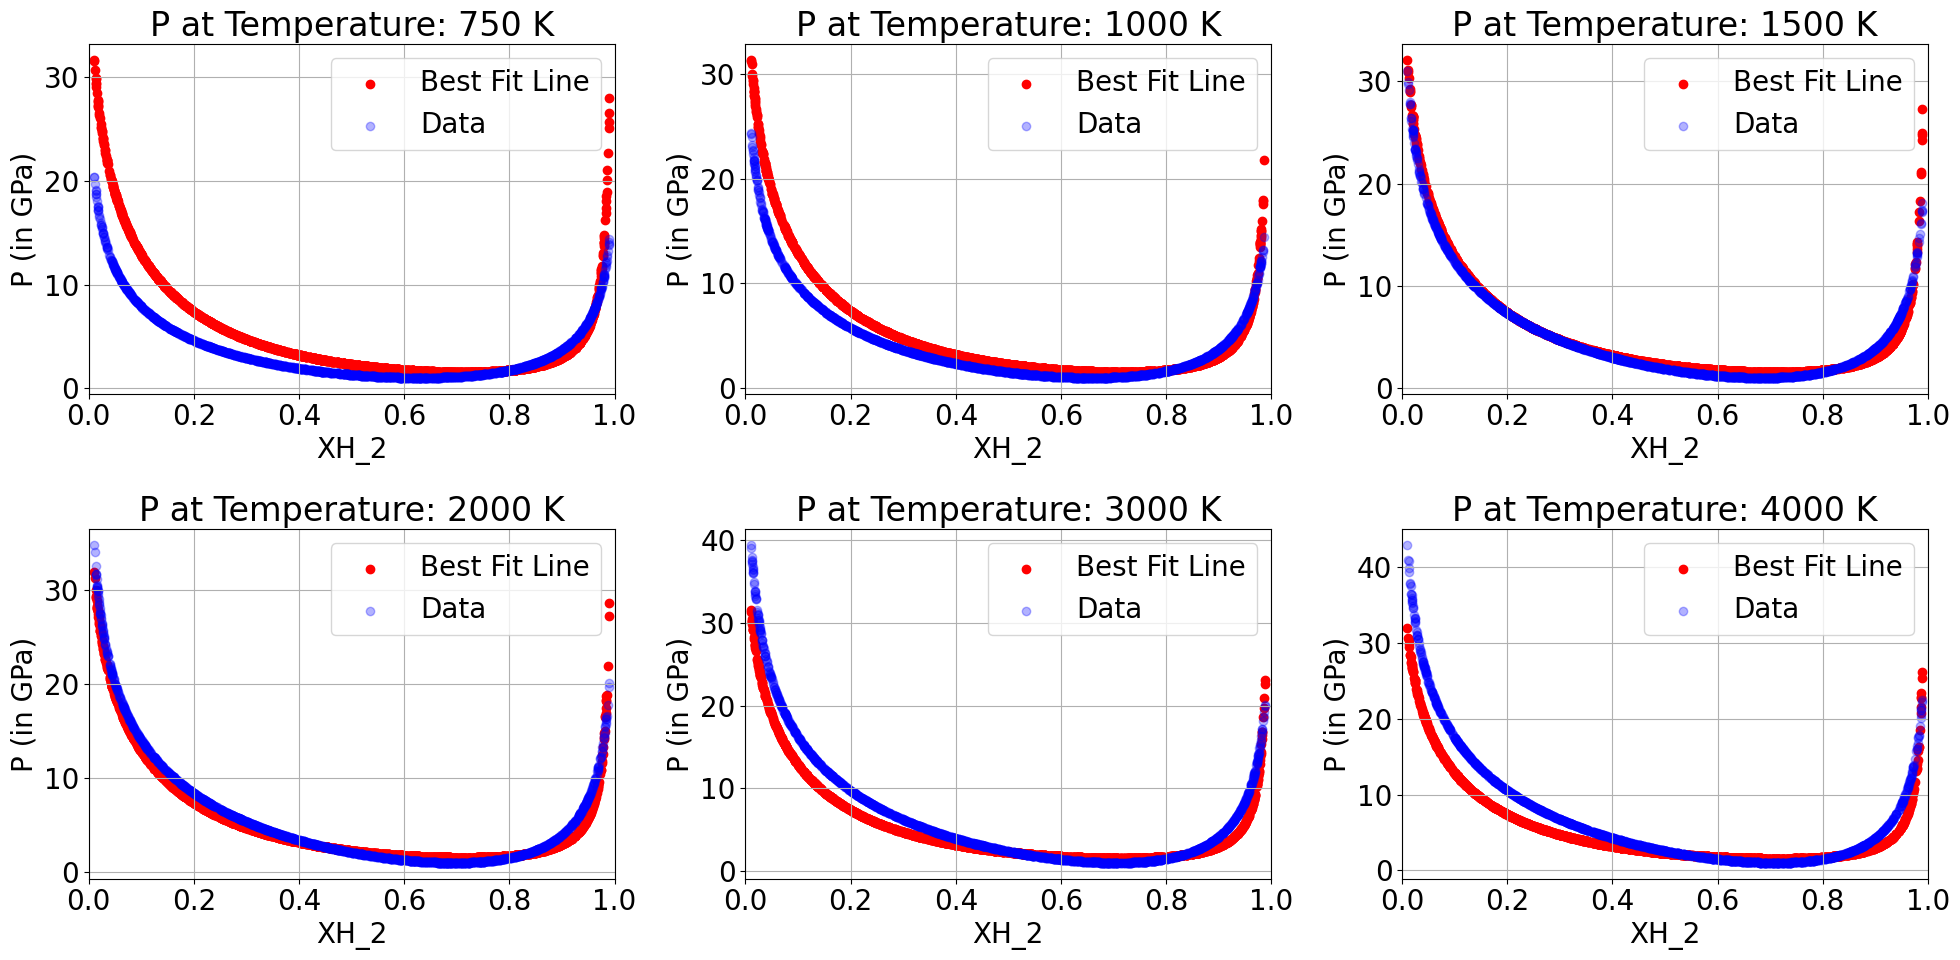

In [65]:
# Temperatures to loop over
temperatures = [750, 1000, 1500, 2000, 3000, 4000]
    
# Create figure and subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
plt.rcParams['font.size'] = 20

for i, temp in enumerate(temperatures):
    ind_arr = np.where(T_arr == temp)[0]
    
    # Refined data
    T_plot = T_arr[ind_arr]
    P_plot = P_norm_arr[ind_arr]
    XH2_plot = XH2_arr[ind_arr]

    # Replace x0 with XH2_plot and x1 with XH2_plot
    x0 = XH2_plot
    x1 = T_plot

    # Predict Y values
    Y_pred = ((x0 - 1.1690382) + ((np.log(x0) / ((-0.40846893 - x0) / 2.9917612)) + (-0.2878233 / np.log(x0)))) - -0.25952122
    # Select subplot
    ax = axes[i // 3, i % 3] 
    
    # Plot the data and the best fit line
    ax.scatter(XH2_plot, Y_pred, label='Best Fit Line', color='red')
    ax.scatter(XH2_plot, P_plot, label='Data', color='blue', alpha=0.3)
    ax.set_xlabel('XH_2')
    ax.set_ylabel('P (in GPa)')
    ax.set_title(f'P at Temperature: {temp} K')
    ax.legend()
    ax.grid(True)
    ax.set_xlim(0, 1)

plt.tight_layout()
plt.show()